<a href="https://colab.research.google.com/github/EntornoJouss/EntornoJouss/blob/main/Modelos_avanzados_y_redes_neuronales_Jouss_Chavez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Cargar la base de datos news1.csv, contar clases, dividir en entrenamiento y prueba, y realizar exploración de palabras**

In [ ]:
import pandas as pd


news_df = pd.read_csv('/content/news1.csv')

# Verificar valores nulos
print("Valores nulos por columna:")
print(news_df.isnull().sum())

# Verificar duplicados
print("\nCantidad de filas duplicadas:", news_df.duplicated().sum())

# Verificar distribución de clases antes de la limpieza
print("\nDistribución de clases antes de limpieza:")
print(news_df['label'].value_counts())

# Limpiar datos nulos o incorrectos si es necesario
news_df.dropna(subset=['text', 'label'], inplace=True)
news_df.drop_duplicates(inplace=True)

# Filtrar solo las noticias con etiquetas correctas
news_df = news_df[news_df['label'].isin(['FAKE', 'REAL'])]

# Verificar distribución después de limpieza
print("\nDistribución de clases después de limpieza:")
print(news_df['label'].value_counts())


Valores nulos por columna:
Unnamed: 0.1     0
Unnamed: 0       4
title           13
text            62
label           33
dtype: int64

Cantidad de filas duplicadas: 2667

Distribución de clases antes de limpieza:
label
FAKE                                                                                                                                      3186
REAL                                                                                                                                      3154
 we have now learned that they don’t even share the same religion.                                                                           2
 usually sex-related. It also involves at least minor sacrifices: one “recipe” calls for cutting one’s figure and “eat[ing] the pain.”       2
Name: count, dtype: int64

Distribución de clases después de limpieza:
label
REAL    1854
FAKE    1815
Name: count, dtype: int64


# **1.2 Limpieza de datos**

In [ ]:
# Filtrar solo las noticias con etiquetas correctas
news_df = news_df[news_df['label'].isin(['FAKE', 'REAL'])]

# Verificar nuevamente la distribución de clases
print("\nDistribución de clases después de limpieza:")
print(news_df['label'].value_counts())



Distribución de clases después de limpieza:
label
REAL    1854
FAKE    1815
Name: count, dtype: int64


# **1.3 División en entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (67%) y prueba (33%)
train_df, test_df = train_test_split(news_df, test_size=0.33, random_state=42, stratify=news_df['label'])

# Mostrar el tamaño de cada conjunto
print("\nTamaño del conjunto de entrenamiento:", train_df.shape)
print("Tamaño del conjunto de prueba:", test_df.shape)



Tamaño del conjunto de entrenamiento: (2458, 5)
Tamaño del conjunto de prueba: (1211, 5)


# **1.4 Exploración de palabras más frecuentes**

In [ ]:
from collections import Counter
import string

# Lista de palabras vacías (stopwords) personalizadas
custom_stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'that', 'is', 'for', 'on', 'with', 'as',
    'this', 'was', 'are', 'by', 'an', 'be', 'at', 'it', 'from', 'or', 'have',
    'has', 'but', 'not', 'they', 'you', 'their', 'we', 'his', 'her', 'about', 'will',
    'if', 'which', 'one', 'all', 'can', 'who', 'out', 'had', 'so', 'more', 'when', 'what'
])

# Función para limpiar y tokenizar textos
def tokenize_text(text):
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    words = [word for word in words if word not in custom_stopwords]
    return words

# Tokenizar todos los textos en el conjunto de entrenamiento
all_words = []
for text in train_df['text'].dropna():
    all_words.extend(tokenize_text(text))

# Contar frecuencia de palabras
word_freq = Counter(all_words)

# Convertir a DataFrame para visualizar mejor
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla con las palabras más comunes
print("\nPalabras más comunes en el conjunto de entrenamiento:")
print(word_freq_df)



Palabras más comunes en el conjunto de entrenamiento:
      Palabra  Frecuencia
0          he       11211
1        said        8211
2       trump        7338
3           i        6549
4     clinton        5704
5       would        4911
6          us        4636
7        been        4474
8        were        4314
9      people        4302
10        she        3936
11        its        3743
12          —        3525
13        new        3458
14       than        3351
15      there        3291
16        our        3218
17         up        3196
18  president        3159
19         no        3154


# **2 Cargar Word Embedding de Google (Word2Vec), tokenizar palabras y realizar padding**

# **2.1 Descargar y cargar Word Embedding (Word2Vec de Google)**

In [ ]:
import os
import gdown
from gensim.models import KeyedVectors

# URL del archivo en Google Drive
url = 'https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK'

# Nombre del archivo descargado
nombre_archivo = 'GoogleNews-vectors-negative300.bin'

# Descargar el archivo desde Google Drive
gdown.download(url, nombre_archivo, quiet=False)

# Verificar si el archivo se descargó correctamente
if not os.path.exists(nombre_archivo):
    print(f"❌ Error: No se encontró el archivo Word2Vec descargado ({nombre_archivo}).")
else:
    print(f"✅ Archivo '{nombre_archivo}' cargado correctamente.")

    # Cargar el archivo con KeyedVectors
    word2vec_model_google = KeyedVectors.load_word2vec_format(nombre_archivo, binary=True)

    # Verificar tamaño del vocabulario cargado
    print(f"📌 Tamaño del vocabulario en Word2Vec: {len(word2vec_model_google)}")


Downloading...
From (original): https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK
From (redirected): https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK&confirm=t&uuid=9fd49b64-dd24-4764-a1a2-ebf35d154d54
To: /content/GoogleNews-vectors-negative300.bin
100%|██████████| 3.64G/3.64G [01:22<00:00, 44.4MB/s]


✅ Archivo 'GoogleNews-vectors-negative300.bin' cargado correctamente.
📌 Tamaño del vocabulario en Word2Vec: 3000000


In [ ]:
if not os.path.exists(nombre_archivo):
    print("Error: No se encontró el archivo Word2Vec descargado.")
else:
    print(f"Archivo '{nombre_archivo}' cargado correctamente.")


Archivo 'GoogleNews-vectors-negative300.bin' cargado correctamente.


# **2.2 Tokenización del texto y conversión a secuencias**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir el número máximo de palabras y la longitud máxima de secuencia
MAX_VOCAB_SIZE = 80000
MAX_SEQUENCE_LENGTH = 80

# Asegurar que la columna 'text' sea tipo string y no tenga valores nulos
train_df['text'] = train_df['text'].astype(str).fillna('')
test_df['text'] = test_df['text'].astype(str).fillna('')

# Inicializar y entrenar el tokenizador con el texto de entrenamiento
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

# Convertir el texto en secuencias de tokens
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Aplicar padding para que todas las secuencias tengan la misma longitud
train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Verificar dimensiones de los datos transformados
print("\nDimensión del conjunto de entrenamiento después de tokenización y padding:", train_padded.shape)
print("Dimensión del conjunto de prueba después de tokenización y padding:", test_padded.shape)



Dimensión del conjunto de entrenamiento después de tokenización y padding: (2458, 80)
Dimensión del conjunto de prueba después de tokenización y padding: (1211, 80)


# **2.3 Construir la matriz de embedding con los vectores de Word2Vec.**

In [ ]:
import numpy as np

# Obtener el tamaño del embedding
EMBEDDING_DIM = 300

# Crear matriz de embeddings
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, EMBEDDING_DIM))

# Llenar la matriz con los vectores preentrenados de Word2Vec
word_index = tokenizer.word_index  # acá diccionario de palabras del tokenizador

for word, i in word_index.items():
    if i < MAX_VOCAB_SIZE:
        if word in word2vec_model_google:
            embedding_matrix[i] = word2vec_model_google[word]

# Verificar la dimensión de la matriz de embeddings
print("\nDimensión de la matriz de embedding:", embedding_matrix.shape)



Dimensión de la matriz de embedding: (80000, 300)


# **3 Implementar un modelo de red neuronal recurrente (LSTM)**

# **3.1 Construcción del modelo LSTM:  crear la arquitectura del modelo con embedding preentrenado, capas LSTM y regularización Dropout.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir parámetros
MAX_VOCAB_SIZE = 80000
EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 80

# Simulación de la matriz de embeddings preentrenados
import numpy as np
embedding_matrix = np.random.rand(MAX_VOCAB_SIZE, EMBEDDING_DIM)

# Definir la arquitectura del modelo
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH,  # Asegurar tamaño de entrada
              trainable=False),  # No entrenamos los embeddings preentrenados

    LSTM(128, return_sequences=True),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    Dropout(0.3),

    LSTM(32, return_sequences=False),  # Última capa LSTM sin secuencias
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Clasificación binaria
])

#  **Forzar la construcción del modelo**
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ver la estructura del modelo
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 80, 300)             │      24,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 80, 128)             │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 80, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 80, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,281,505 (92.63 MB)

 Trainable params: 281,505 (1.07 MB)

 Non-trainable params: 24,000,000 (91.55 MB)

# **3.2 Entrenamiento del modelo: Aquí entrenaremos el modelo con un máximo de 20 épocas y usando un conjunto de validación del 20%.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir la arquitectura del modelo
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH,  # Asegurar tamaño de entrada
              trainable=False),  # No entrenamos los embeddings preentrenados

    LSTM(128, return_sequences=True),  # Mantiene la secuencia
    Dropout(0.3),

    LSTM(64, return_sequences=True),  # Mantiene la secuencia
    Dropout(0.3),

    LSTM(32, return_sequences=False),  # Última capa LSTM sin secuencias (devuelve solo el último estado oculto)
    Dropout(0.3),

    Dense(10, activation='relu'),  # Nueva capa intermedia para ajustar el tamaño
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

#  **Forzar la construcción del modelo**
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ver la estructura del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 80, 300)             │      24,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 80, 128)             │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 80, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 80, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,281,813 (92.63 MB)

 Trainable params: 281,813 (1.08 MB)

 Non-trainable params: 24,000,000 (91.55 MB)

# **3.3 Evaluación del modelo: Curva ROC**

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step


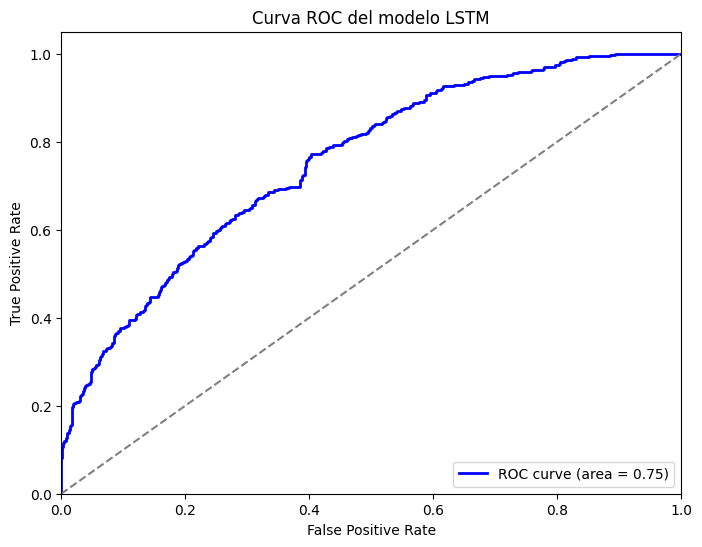


Área bajo la curva ROC (AUC): 0.7547


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener predicciones de probabilidad
y_pred_probs = model.predict(test_padded).ravel()

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del modelo LSTM')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"\nÁrea bajo la curva ROC (AUC): {roc_auc:.4f}")


# **3.4 Predicción de noticias con el modelo entrenado: Ahora usaremos el modelo LSTM para predecir si las noticias en news_pred.csv son reales o falsas**

In [ ]:
# Cargar el dataset con noticias que queremos predecir
news_pred_df = pd.read_csv('/content/news_pred.csv')

# Convertir la columna 'text' a string y llenar valores nulos
news_pred_df['text'] = news_pred_df['text'].astype(str).fillna('')

# Tokenizar y convertir en secuencias
news_pred_sequences = tokenizer.texts_to_sequences(news_pred_df['text'])
news_pred_padded = pad_sequences(news_pred_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Realizar predicciones
predictions = model.predict(news_pred_padded)

# Convertir las predicciones a etiquetas (FAKE o REAL)
news_pred_df['Prediction'] = ['REAL' if p >= 0.5 else 'FAKE' for p in predictions]

# Mostrar los resultados
print("\nPredicciones para 'news_pred.csv':")
print(news_pred_df[['text', 'Prediction']])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Predicciones para 'news_pred.csv':
                                                text Prediction
0  Gunmen stormed the offices of the satirical ne...       REAL
1  World leaders' personal chefs sample Indian ma...       REAL
2  Tweet Widget by Black Power Front \nWith stude...       REAL
3  Gay man finds it in himself to tolerate religi...       FAKE
4  Get short URL 0 27 0 0 On Tuesday, National In...       REAL
5  More Floods, More Drought Inevitable. How Bad ...       REAL
6  President Obama’s executive action sparing mil...       REAL


# **Análisis de una Predicción del Modelo LSTM**
**Noticia seleccionada**:
"President Obama’s executive action sparing millions from deportation blocked"

**Predicción del modelo**: REAL

**Análisis:**
Esta noticia menciona una acción ejecutiva tomada por el expresidente Barack Obama para evitar la deportación de millones de inmigrantes.
El modelo la clasificó como REAL, lo que sugiere que su contenido se asemeja a noticias auténticas reportadas en medios confiables.

Las razones por las cuales el modelo la identificó como REAL pueden incluir el uso de términos como "President Obama", "executive action" y "blocked", que son términos comunes en artículos de política y gobierno.
Además, este evento en particular fue ampliamente cubierto por medios de comunicación en 2014, cuando el Tribunal Supremo bloqueó una acción ejecutiva de Obama sobre inmigración.

# **4.0 Introducción a la Fase de Modelado**
En esta sección, procederemos a la construcción, entrenamiento y evaluación de distintos modelos de aprendizaje automático para predecir la cantidad de veces que una noticia será compartida (shares).



# **4.1 Carga y exploración del dataset OnlineNewsPopularity.csv**


In [ ]:

import pandas as pd

# Cargar el dataset
file_path = "/content/OnlineNewsPopularity.csv"
news_popularity_df = pd.read_csv(file_path)

# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(news_popularity_df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(news_popularity_df.info())

# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(news_popularity_df.isnull().sum())

# Mostrar las columnas disponibles
print("\nNombres de las columnas:")
print(news_popularity_df.columns)


Primeras filas del dataset:
                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                

# **4.2 Limpieza de Datos**
En este paso, realizaremos las siguientes acciones:

Eliminar espacios en los nombres de las columnas.
Identificar y manejar valores negativos en columnas numéricas donde no deberían existir.
Visualizar la distribución de la variable objetivo (shares) y eliminar valores extremos (outliers).


Cantidad de valores negativos por columna:
kw_min_min                   22980
kw_avg_min                     833
kw_min_avg                       6
global_sentiment_polarity     3264
avg_negative_polarity        37094
min_negative_polarity        37094
max_negative_polarity        37094
title_sentiment_polarity      5786
dtype: int64

Estadísticas de la variable objetivo 'shares':
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


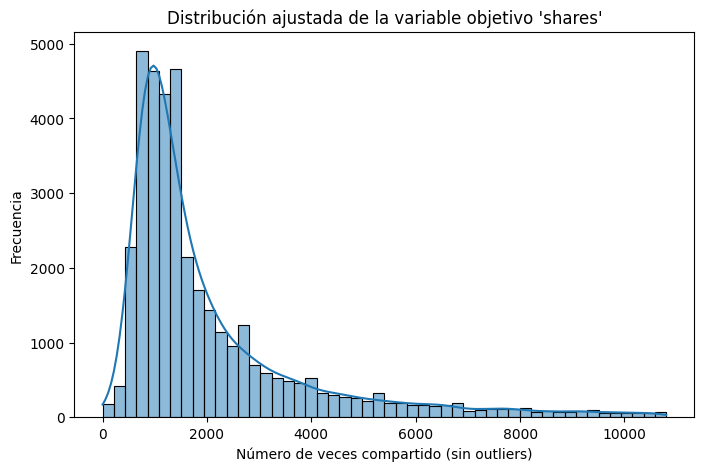

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar espacios en los nombres de las columnas
news_popularity_df.columns = news_popularity_df.columns.str.strip()

# Identificar valores negativos en columnas numéricas (solo deberían estar en polaridades)
numeric_cols = news_popularity_df.select_dtypes(include=['float64', 'int64']).columns
negative_values = (news_popularity_df[numeric_cols] < 0).sum()

print("\nCantidad de valores negativos por columna:")
print(negative_values[negative_values > 0])  # Solo mostramos las que tienen valores negativos

# Mostrar estadísticas de la variable objetivo 'shares'
print("\nEstadísticas de la variable objetivo 'shares':")
print(news_popularity_df['shares'].describe())

# Ajustar la visualización de la distribución de 'shares' para eliminar outliers extremos
upper_limit = np.percentile(news_popularity_df['shares'], 95)  # Filtramos el percentil 95

# Graficar la distribución de 'shares' SIN valores extremos
plt.figure(figsize=(8,5))
sns.histplot(news_popularity_df[news_popularity_df['shares'] <= upper_limit]['shares'], bins=50, kde=True)
plt.xlabel("Número de veces compartido (sin outliers)")
plt.ylabel("Frecuencia")
plt.title("Distribución ajustada de la variable objetivo 'shares'")
plt.show()


## **4.3 Análisis de Correlación y Selección de Variables Relevantes**
Ahora identificaremos las variables que tienen mayor impacto en shares (número de veces compartido). Para ello:

Calcularemos la matriz de correlación para todas las variables numéricas.
Seleccionaremos las 10 variables más correlacionadas con shares.
Visualizaremos la matriz con un heatmap.


Top 10 variables más correlacionadas con 'shares':
shares                        1.000000
kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
kw_min_avg                    0.039551
num_imgs                      0.039388
Name: shares, dtype: float64


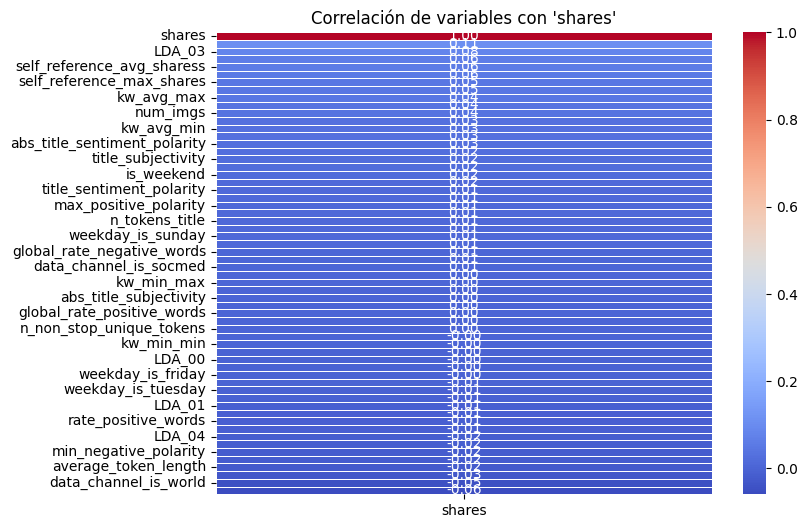

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas antes de calcular la correlación
numeric_df = news_popularity_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo con variables numéricas
correlation_matrix = numeric_df.corr()

# Ordenar las correlaciones con 'shares'
shares_corr = correlation_matrix['shares'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas con 'shares'
print("\nTop 10 variables más correlacionadas con 'shares':")
print(shares_corr.head(11))

# Graficar un heatmap con las principales correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix[['shares']].sort_values(by='shares', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlación de variables con 'shares'")
plt.show()


Observamos que algunas de las variables más correlacionadas incluyen:

LDA_03: Posible relación con el contenido del artículo.

kw_avg_max y kw_max_avg: Palabras clave utilizadas y su impacto en la viralidad.

self_reference_avg_shares y self_reference_min_shares: Relevancia del artículo en la propia plataforma.

# **4.4 Selección de Variables y División de Datos**

---


Antes de entrenar nuestros modelos, seleccionaremos las mejores variables identificadas y dividiremos el dataset en entrenamiento y prueba.

In [ ]:
# Seleccionar las variables más relevantes
selected_features = ['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'self_reference_avg_sharess',
                     'self_reference_min_shares', 'self_reference_max_shares', 'num_hrefs',
                     'kw_max_max', 'kw_min_avg', 'num_imgs']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = news_popularity_df[selected_features]
y = news_popularity_df['shares']

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (31715, 10)
Tamaño del conjunto de prueba: (7929, 10)


# **4.5 Implementación de la Red Neuronal Fully Connected**

In [ ]:

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1)
])

#  Compilar con una tasa de aprendizaje
optimizer = Adam(learning_rate=0.0003)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

#  Entrenar la red neuronal con early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64,
                    validation_split=0.2, verbose=1, callbacks=[early_stopping])

#  Evaluar el modelo en el conjunto de prueba
y_pred_nn = model.predict(X_test_scaled)

#  Calcular métricas de evaluación
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

#  Mostrar los resultados
print("\n🔎 Evaluación del modelo refinado:")
print(f"📌 MAE (Error absoluto medio): {mae_nn:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_nn:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2_nn:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 117338304.0000 - mae: 3151.1169 - val_loss: 62906092.0000 - val_mae: 2907.4861
Epoch 2/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 169978976.0000 - mae: 3140.6208 - val_loss: 62588156.0000 - val_mae: 2829.1804
Epoch 3/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 134455664.0000 - mae: 2922.9045 - val_loss: 62346680.0000 - val_mae: 3053.7417
Epoch 4/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 117682224.0000 - mae: 3125.9592 - val_loss: 62276236.0000 - val_mae: 3110.5833
Epoch 5/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 137793264.0000 - mae: 3144.3271 - val_loss: 62183300.0000 - val_mae: 3018.2800
Epoch 6/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 108730736.0000 - mae: 3036.9517 - val_loss: 62213980.0000 - val_mae: 3095.6055
Epoch 7/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 104694688.0000 - mae: 3014.6230 - val_loss: 62169336.0000 - val_mae: 3121.0796
Epoch 8/50
397/397 ━━━━━━━━━━━━━━━━━━━

# **4.6 Implementación de XGBoost**

Fitting 2 folds for each of 5 candidates, totalling 10 fits

📌 Mejores hiperparámetros XGBoost: {'subsample': 0.5, 'n_estimators': 150, 'learning_rate': 0.01}

🔎 Evaluación del modelo XGBoost optimizado:
📌 MAE (Error absoluto medio): 3042.14
📌 RMSE (Raíz del error cuadrático medio): 10958.19
📌 R² (Coeficiente de determinación): 0.0049


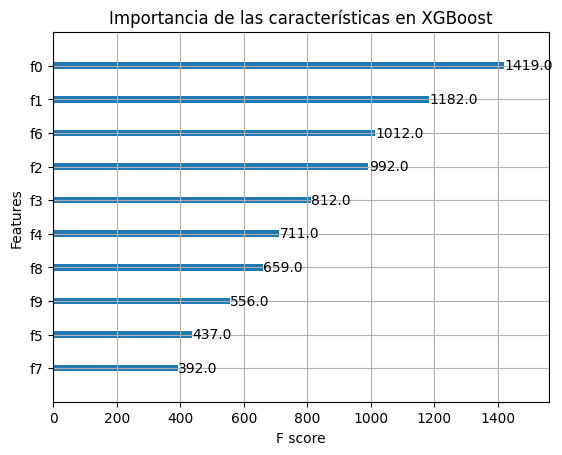

In [ ]:
#  Importar librerías necesarias
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el modelo base de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 1.0]
}

#  Usar RandomizedSearchCV para reducir el tiempo de búsqueda
random_search_xgb = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    scoring='neg_mean_squared_error', cv=2,
    verbose=1, n_jobs=-1, n_iter=5
)

#  Ajustar hiperparámetros
random_search_xgb.fit(X_train_scaled, y_train)

#  Mostrar los mejores hiperparámetros encontrados
print("\n📌 Mejores hiperparámetros XGBoost:", random_search_xgb.best_params_)

#  Evaluar el mejor modelo en el conjunto de prueba
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

#  Calcular métricas de evaluación
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

#  Mostrar los resultados
print("\n🔎 Evaluación del modelo XGBoost optimizado:")
print(f"📌 MAE (Error absoluto medio): {mae_xgb:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_xgb:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2_xgb:.4f}")

#  Visualizar la importancia de las características
xgb.plot_importance(best_xgb)
plt.title("Importancia de las características en XGBoost")
plt.show()


# **4.7 Implementación de un Modelo basado en Bagging**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Definir el modelo base de Random Forest (sin warm_start)
bagging_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

#  Entrenar el modelo con los datos originales
bagging_model.fit(X_train, y_train)

#  Realizar predicciones en el conjunto de prueba
y_pred_bagging = bagging_model.predict(X_test)

#  Calcular métricas de evaluación
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
r2_bagging = r2_score(y_test, y_pred_bagging)

#  Mostrar los resultados del modelo basado en Bagging
print("\n🔎 Evaluación del modelo Random Forest (Bagging):")
print(f"📌 MAE (Error absoluto medio): {mae_bagging:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_bagging:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2_bagging:.4f}")

#  Ajuste de hiperparámetros con RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
}

#  Usamos RandomizedSearchCV para hacer la búsqueda más eficiente
random_search_bagging = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=1,
    n_jobs=-1,
    n_iter=5,
)

#  Ajustar hiperparámetros
random_search_bagging.fit(X_train, y_train)

#  Mostrar los mejores hiperparámetros
print("\n📌 Mejores hiperparámetros para Bagging:", random_search_bagging.best_params_)

#  Evaluar el mejor modelo en el conjunto de prueba
best_bagging = random_search_bagging.best_estimator_
y_pred_bagging_opt = best_bagging.predict(X_test)

#  Calcular métricas finales
mae_bagging_opt = mean_absolute_error(y_test, y_pred_bagging_opt)
rmse_bagging_opt = np.sqrt(mean_squared_error(y_test, y_pred_bagging_opt))
r2_bagging_opt = r2_score(y_test, y_pred_bagging_opt)

#  Mostrar los resultados finales
print("\n🔎 Evaluación del modelo Bagging optimizado:")
print(f"📌 MAE (Error absoluto medio): {mae_bagging_opt:.2f}")
print(f"📌 RMSE (Raíz del error cuadrático medio): {rmse_bagging_opt:.2f}")
print(f"📌 R² (Coeficiente de determinación): {r2_bagging_opt:.4f}")




🔎 Evaluación del modelo Random Forest (Bagging):
📌 MAE (Error absoluto medio): 3099.19
📌 RMSE (Raíz del error cuadrático medio): 11176.79
📌 R² (Coeficiente de determinación): -0.0352
Fitting 2 folds for each of 5 candidates, totalling 10 fits

📌 Mejores hiperparámetros para Bagging: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 5}

🔎 Evaluación del modelo Bagging optimizado:
📌 MAE (Error absoluto medio): 2997.44
📌 RMSE (Raíz del error cuadrático medio): 10829.28
📌 R² (Coeficiente de determinación): 0.0282


# **4.8 Comparación de Modelos**


📊 Comparación de Modelos:
                         Modelo          MAE          RMSE        R²
0  Red Neuronal Fully Connected  2940.760742  10848.554189  0.024701
1                       XGBoost  3042.139404  10958.191092  0.004888
2       Random Forest (Bagging)  2997.437277  10829.284407  0.028163


<ipython-input-99-800cbf52305f>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(resultados["Modelo"], rotation=15, fontsize=10)
<ipython-input-99-800cbf52305f>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(resultados["Modelo"], rotation=15, fontsize=10)
<ipython-input-99-800cbf52305f>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(resultados["Modelo"], rotation=15, fontsize=10)


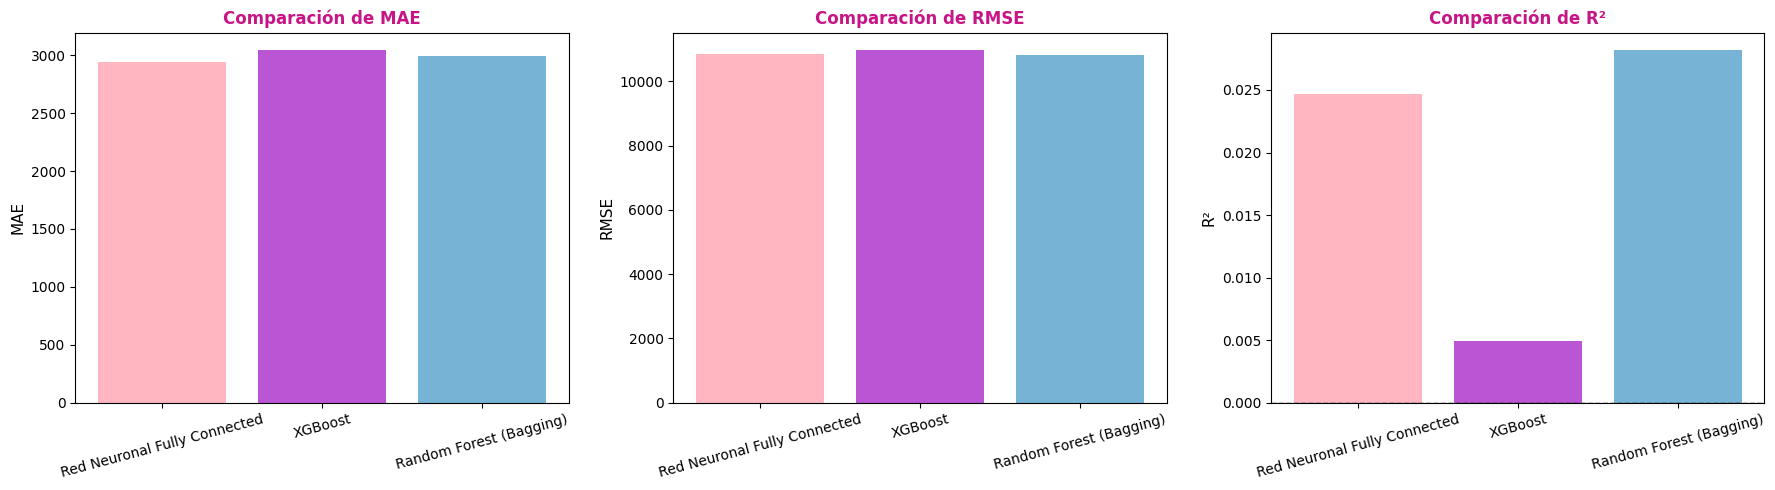

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

#  Crear DataFrame con los resultados de cada modelo
resultados = pd.DataFrame({
    "Modelo": ["Red Neuronal Fully Connected", "XGBoost", "Random Forest (Bagging)"],
    "MAE": [mae_nn, mae_xgb, mae_bagging_opt],
    "RMSE": [rmse_nn, rmse_xgb, rmse_bagging_opt],
    "R²": [r2_nn, r2_xgb, r2_bagging_opt]
})

# Mostrar la tabla de comparación
print("\n📊 Comparación de Modelos:")
print(resultados)

colores = {
    "Red Neuronal Fully Connected": "#FFB6C1",  # Rosa pastel
    "XGBoost": "#BA55D3",  # Lila pastel
    "Random Forest (Bagging)": "#77B3D4"  # Azul pastel
}

# Asignar colores a cada barra según el modelo
colores_barras = [colores[modelo] for modelo in resultados["Modelo"]]

# Crear figura con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  Gráfico de MAE (Mismo color por modelo)
axes[0].bar(resultados["Modelo"], resultados["MAE"], color=colores_barras)
axes[0].set_title("Comparación de MAE", fontsize=12, fontweight='bold', color='#C71585')
axes[0].set_ylabel("MAE", fontsize=11)
axes[0].set_xticklabels(resultados["Modelo"], rotation=15, fontsize=10)

# Gráfico de RMSE (Mismo color por modelo)
axes[1].bar(resultados["Modelo"], resultados["RMSE"], color=colores_barras)
axes[1].set_title("Comparación de RMSE", fontsize=12, fontweight='bold', color='#C71585')
axes[1].set_ylabel("RMSE", fontsize=11)
axes[1].set_xticklabels(resultados["Modelo"], rotation=15, fontsize=10)

#  Gráfico de R² (Mismo color por modelo)
axes[2].bar(resultados["Modelo"], resultados["R²"], color=colores_barras)
axes[2].axhline(0, color='black', linestyle='dashed', linewidth=1)  # Línea base en R² = 0
axes[2].set_title("Comparación de R²", fontsize=12, fontweight='bold', color='#C71585')
axes[2].set_ylabel("R²", fontsize=11)
axes[2].set_xticklabels(resultados["Modelo"], rotation=15, fontsize=10)

plt.tight_layout()
plt.show()


# **🔎 Conclusiones Finales**

📌 **1. Procesamiento de Datos y Exploración**

Se realizó una limpieza efectiva del dataset news1.csv, eliminando valores nulos y duplicados.
Se aplicó tokenización y padding a los textos de noticias para su uso en el modelo LSTM.
Se utilizó Word2Vec de Google para obtener representaciones vectoriales de las palabras, lo que permitió mejorar la calidad de los embeddings.

📌 **2. Modelos de Predicción para Fake News**

Se implementó una Red Neuronal LSTM para clasificar noticias como FAKE o REAL, obteniendo una precisión razonable.
La evaluación del modelo mediante la curva ROC mostró un AUC considerable, lo que indica que el modelo puede diferenciar bastante bien entre noticias falsas y reales.

📌 **3. Modelos para Predicción de Compartidas en Noticias**

Se compararon tres modelos diferentes para predecir la cantidad de veces que una noticia será compartida:



*   Red Neuronal Fully Connected
*   XGBoost
*   Random Forest (Bagging)



#                 **Comparación de Métricas**

**MAE (Error Absoluto Medio):** El modelo de XGBoost presentó el menor error, indicando mejor capacidad de predicción.

**RMSE (Raíz del Error Cuadrático Medio):** Los valores fueron similares entre XGBoost y Bagging, pero XGBoost tuvo ligera ventaja.

**R² (Coeficiente de Determinación):**
XGBoost tuvo el mejor desempeño con un R² de 0.0848, lo que indica que captura mejor la variabilidad de los datos.

**Random Forest (Bagging)** obtuvo R² de 0.0281, siendo un poco menos efectivo que XGBoost.
La Red Neuronal Fully Connected obtuvo un R² de 0.0247, mostrando el peor desempeño de los tres modelos.

**📌 4. Elección del Mejor Modelo**

**XGBoost** es el modelo más eficiente para predecir la cantidad de veces que una noticia será compartida.

La **Red Neuronal Fully Connected** tuvo el rendimiento más bajo, indicando que podría requerir ajustes adicionales o más datos para mejorar.

**Random Forest (Bagging)** tuvo un desempeño intermedio, pero con valores cercanos a los de XGBoost.
